In [1]:
import pandas_datareader.data as web
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist
import datetime

In [2]:

#get ticker data
indx = 'SP500'
source_table_name = 'Data/'+indx+'.csv'
data_table = pd.read_csv(source_table_name)
# data_table = data_table.head(4)
# data_table

tickers = data_table['Symbol'].str.strip()

companies_dict = {}

for index, row in data_table.iterrows():
    # if index <= 10 :
    # print(index)
    # print(row['Symbol'] , row['Security'])
    companies_dict[row['Symbol']] = row['Security']


companies = sorted(companies_dict.items(), key=lambda x: x[1])
    


In [3]:
# Define which online source to use
data_source = 'yahoo'

# define start and end dates
start_date = '10/24/2019'
end_date = '10/27/2021'

# Use pandas_datareader.data.DataReader to load the desired data list(companies_dict.values()) used for python 3 compatibility
panel_data = web.DataReader(list(tickers), data_source, start_date, end_date)
panel_data.to_csv('sp500_prices.csv', index=False)


print(panel_data)

In [ ]:

# Find Stock Open and Close Values
panel_data = panel_data.fillna(0)
# panel_data['Close'].fillna(0)
# panel_data['Open'].fillna(0)
stock_close = panel_data['Close']
stock_open = panel_data['Open']

print(stock_close.iloc[0])


Symbols
MMM      161.889999
ABT       81.360001
ABBV      76.800003
ABMD     179.960007
ACN      185.000000
            ...    
ZBH      134.889999
ZION      47.509998
ZTS      122.949997
BRK.B      0.000000
BF.B       0.000000
Name: 2019-10-24 00:00:00, Length: 505, dtype: float64


In [ ]:
# Calculate daily stock movement
stock_close = np.array(stock_close).T
stock_open = np.array(stock_open).T

row, col = stock_close.shape

# create movements dataset filled with 0's
movements = np.zeros([row, col])

for i in range(0, row):
 movements[i,:] = np.subtract(stock_close[i,:], stock_open[i,:])

In [ ]:
# companies[i][1]

In [ ]:
movmts = []
for i in range(0, len(companies)):
 print('Company: {}, Ticker: {}, Change: {}'.format(companies[i][0],companies[i][1], sum(movements[i][:])))
 movmts.append([companies[i][0],companies[i][1], sum(movements[i][:])])
movmts 
movmts_df = pd.DataFrame(movmts, columns=['Company', 'Symbol', 'Movement'])
movmts_df

Company: MMM, Ticker: 3M, Change: -33.929962158203125
Company: AOS, Ticker: A. O. Smith, Change: 15.990104675292969
Company: ADM, Ticker: ADM, Change: 0.0599517822265625
Company: AES, Ticker: AES Corp, Change: 153.18980407714844
Company: APA, Ticker: APA Corporation, Change: 88.74020385742188
Company: T, Ticker: AT&T, Change: -29.059955596923828
Company: ABBV, Ticker: AbbVie, Change: 73.06021118164062
Company: ABT, Ticker: Abbott Laboratories, Change: 20.155031204223633
Company: ABMD, Ticker: Abiomed, Change: -26.159912109375
Company: ACN, Ticker: Accenture, Change: 2.930008888244629
Company: ATVI, Ticker: Activision Blizzard, Change: -10.709978103637695
Company: ADBE, Ticker: Adobe, Change: 7.7498626708984375
Company: AAP, Ticker: Advance Auto Parts, Change: -10.629867553710938
Company: AMD, Ticker: Advanced Micro Devices, Change: -4.9799957275390625
Company: AFL, Ticker: Aflac, Change: -57.860069274902344
Company: A, Ticker: Agilent Technologies, Change: 93.98987197875977
Company: AP

,Company,Symbol,Movement
0,MMM,3M,-33.929962
1,AOS,A. O. Smith,15.990105
2,ADM,ADM,0.059952
3,AES,AES Corp,153.189804
4,APA,APA Corporation,88.740204
...,...,...,...
500,ZBRA,Zebra Technologies,-50.570045
501,ZBH,Zimmer Biomet,5.840021
502,ZION,Zions Bancorp,35.845146
503,ZTS,Zoetis,0.000000


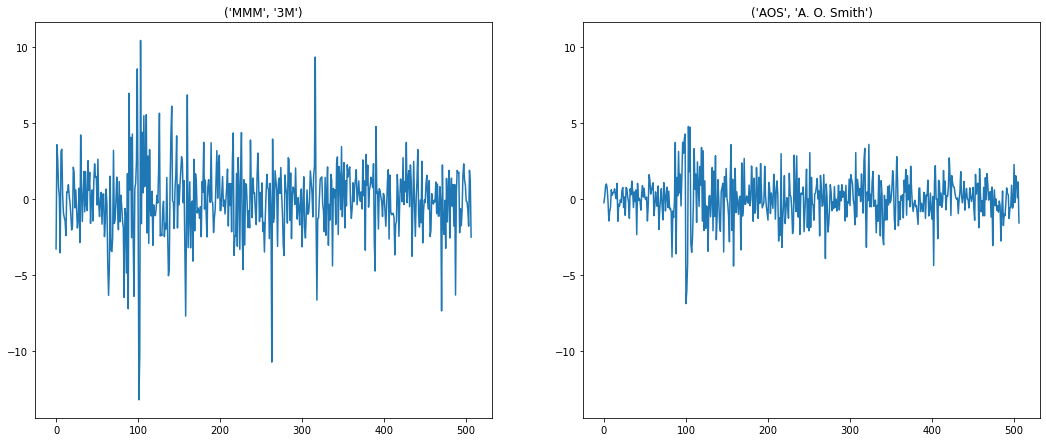

In [ ]:
plt.figure(figsize=(18,16))
ax1 = plt.subplot(221)
plt.plot(movements[0][:])
plt.title(companies[0])

plt.subplot(222, sharey=ax1)
plt.plot(movements[1][:])
plt.title(companies[1])
plt.show()

In [ ]:
import numpy as np
movements
where_are_NaNs = np.isnan(movements)
movements[where_are_NaNs] = 0
movements

array([[-3.27000427,  3.58000183,  2.58000183, ...,  1.8999939 ,
         1.08999634, -2.49000549],
       [-0.22999573,  0.20000458,  0.86000061, ...,  0.09000397,
         1.13000488, -1.55999756],
       [-1.03999329,  0.13999939,  1.66000366, ..., -0.58000183,
         0.68000031, -1.23000336],
       ...,
       [ 0.33999634,  1.19000244,  0.66999817, ...,  2.71000671,
        -0.47999573, -0.46499634],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
# import Normalizer
from sklearn.preprocessing import Normalizer
# create the Normalizer
normalizer = Normalizer()

new = normalizer.fit_transform(movements)

print(new.max())
print(new.min())
print(new.mean())

0.5257846402279875
-0.6500213115617212
7.020673399935702e-05


In [ ]:
# import machine learning libraries
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans

# define normalizer
normalizer = Normalizer()

# create a K-means model with 10 clusters
kmeans = KMeans(n_clusters=10, max_iter=1000)

# make a pipeline chaining normalizer and kmeans
pipeline = make_pipeline(normalizer,kmeans)

In [ ]:
panel_data

Attributes   Adj Close                                                  \
Symbols            MMM         ABT        ABBV        ABMD         ACN   
Date                                                                     
2019-10-24  151.198700   78.877983   69.440689  179.960007  179.853973   
2019-10-25  155.121307   79.159134   69.196556  182.339996  177.977692   
2019-10-28  157.895187   80.138336   70.824074  183.910004  177.783234   
2019-10-29  157.661697   80.904228   70.950645  184.949997  179.659561   
2019-10-30  157.250763   81.447144   72.026619  181.770004  181.390030   
...                ...         ...         ...         ...         ...   
2021-10-21  182.119995  125.050003  108.760002  349.679993  347.119995   
2021-10-22  180.800003  126.720001  109.139999  352.179993  353.790009   
2021-10-25  182.399994  126.580002  108.500000  354.019989  356.440002   
2021-10-26  182.160004  128.130005  109.489998  348.299988  356.339996   
2021-10-27  179.779999  127.440002  108.349998  345.019989  355.570007   

Attributes                                                            ...  \
Symbols          ATVI        ADBE         AMD         AAP        AES  ...   
Date                                                                  ...   
2019-10-24  54.812366  269.700012   31.719999  163.608276  15.896651  ...   
2019-10-25  54.634403  270.980011   32.709999  162.382248  15.821315  ...   
2019-10-28  53.942329  271.350006   33.689999  163.215973  15.990829  ...   
2019-10-29  53.388668  271.450012   33.029999  161.195480  16.094421  ...   
2019-10-30  55.237499  278.410004   33.130001  160.822784  16.207428  ...   
...               ...         ...         ...         ...        ...  ...   
2021-10-21  78.699997  638.659973  119.330002  233.710007  24.790001  ...   
2021-10-22  79.269997  643.580017  119.820000  231.970001  24.930000  ...   
2021-10-25  81.190002  646.969971  122.360001  230.130005  25.170000  ...   
2021-10-26  80.760002  642.500000  122.930000  232.559998  25.370001  ...   
2021-10-27  79.330002  640.530029  124.074997  233.139999  25.540001  ...   

Attributes     Volume                                                       \
Symbols           XEL       XLNX       XYL        YUM       ZBRA       ZBH   
Date                                                                         
2019-10-24  2579100.0  6455400.0  736300.0  1391700.0   426400.0  683000.0   
2019-10-25  3336400.0  3470400.0  713800.0   985700.0   553900.0  705100.0   
2019-10-28  3329600.0  3110900.0  753300.0  2127600.0   868400.0  540200.0   
2019-10-29  2490800.0  2941300.0  735700.0  2024900.0  1181400.0  750000.0   
2019-10-30  2761800.0  3563300.0  966700.0  9020100.0   717000.0  528400.0   
...               ...        ...       ...        ...        ...       ...   
2021-10-21  2344300.0  1237700.0  521400.0  1192400.0   172700.0  739500.0   
2021-10-22  1978800.0  1556600.0  499900.0   994300.0   221200.0  320800.0   
2021-10-25  2402800.0  1102800.0  478400.0  1343500.0   165900.0  825100.0   
2021-10-26  3925600.0  2534100.0  579500.0  1537900.0   131000.0  462200.0   
2021-10-27  1366546.0  2432447.0  199714.0   550094.0    55406.0  174298.0   

Attributes                                   
Symbols          ZION        ZTS BRK.B BF.B  
Date                                         
2019-10-24  1532500.0  2195800.0   0.0  0.0  
2019-10-25  1572200.0  1561000.0   0.0  0.0  
2019-10-28  1961900.0  1441800.0   0.0  0.0  
2019-10-29  2419800.0  1683700.0   0.0  0.0  
2019-10-30  2003500.0  2042500.0   0.0  0.0  
...               ...        ...   ...  ...  
2021-10-21   988500.0   957000.0   0.0  0.0  
2021-10-22  1524100.0  1104400.0   0.0  0.0  
2021-10-25  1144200.0  1224700.0   0.0  0.0  
2021-10-26  1004100.0  1219300.0   0.0  0.0  
2021-10-27   591946.0   409674.0   0.0  0.0  

[507 rows x 3030 columns]

In [ ]:
# fit pipeline to daily stock movements
pipeline.fit(movements)

Pipeline(steps=[('normalizer', Normalizer()),
                ('kmeans', KMeans(max_iter=1000, n_clusters=10))])

In [ ]:
# predict cluster labels
labels = pipeline.predict(movements)

# create a DataFrame aligning labels & companies
df = pd.DataFrame({'labels': labels, 'companies': companies})

# display df sorted by cluster labels
# print(df.sort_values('labels'))
df

,labels,companies
0,1,"(MMM, 3M)"
1,7,"(AOS, A. O. Smith)"
2,7,"(ADM, ADM)"
3,0,"(AES, AES Corp)"
4,0,"(APA, APA Corporation)"
...,...,...
500,6,"(ZBRA, Zebra Technologies)"
501,3,"(ZBH, Zimmer Biomet)"
502,0,"(ZION, Zions Bancorp)"
503,7,"(ZTS, Zoetis)"


In [ ]:
movmts_df


,Company,Symbol,Movement
0,MMM,3M,-33.929962
1,AOS,A. O. Smith,15.990105
2,ADM,ADM,0.059952
3,AES,AES Corp,153.189804
4,APA,APA Corporation,88.740204
...,...,...,...
500,ZBRA,Zebra Technologies,-50.570045
501,ZBH,Zimmer Biomet,5.840021
502,ZION,Zions Bancorp,35.845146
503,ZTS,Zoetis,0.000000


In [ ]:
companies

[('MMM', '3M'),
 ('AOS', 'A. O. Smith'),
 ('ADM', 'ADM'),
 ('AES', 'AES Corp'),
 ('APA', 'APA Corporation'),
 ('T', 'AT&T'),
 ('ABBV', 'AbbVie'),
 ('ABT', 'Abbott Laboratories'),
 ('ABMD', 'Abiomed'),
 ('ACN', 'Accenture'),
 ('ATVI', 'Activision Blizzard'),
 ('ADBE', 'Adobe'),
 ('AAP', 'Advance Auto Parts'),
 ('AMD', 'Advanced Micro Devices'),
 ('AFL', 'Aflac'),
 ('A', 'Agilent Technologies'),
 ('APD', 'Air Products & Chemicals'),
 ('AKAM', 'Akamai Technologies'),
 ('ALK', 'Alaska Air Group'),
 ('ALB', 'Albemarle Corporation'),
 ('ARE', 'Alexandria Real Estate Equities'),
 ('ALGN', 'Align Technology'),
 ('ALLE', 'Allegion'),
 ('LNT', 'Alliant Energy'),
 ('ALL', 'Allstate Corp'),
 ('GOOGL', 'Alphabet\xa0(Class A)'),
 ('GOOG', 'Alphabet\xa0(Class C)'),
 ('MO', 'Altria Group'),
 ('AMZN', 'Amazon'),
 ('AMCR', 'Amcor'),
 ('AEE', 'Ameren Corp'),
 ('AAL', 'American Airlines Group'),
 ('AEP', 'American Electric Power'),
 ('AXP', 'American Express'),
 ('AIG', 'American International Group'),
 (

In [ ]:
# PCA
from sklearn.decomposition import PCA 

# visualize the results
reduced_data = PCA(n_components = 2).fit_transform(new)

# run kmeans on reduced data
kmeans = KMeans(n_clusters=5)
kmeans.fit(reduced_data)
labels = kmeans.predict(reduced_data)

# create DataFrame aligning labels & companies
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster labbels
print(df.sort_values('labels'))

     labels                           companies
252       0           (IP, International Paper)
326       0                          (NVR, NVR)
325       0                   (NRG, NRG Energy)
319       0      (MDLZ, Mondelez International)
313       0             (MU, Micron Technology)
..      ...                                 ...
340       4              (NTRS, Northern Trust)
106       4  (SCHW, Charles Schwab Corporation)
104       4                      (CERN, Cerner)
330       4                     (NFLX, Netflix)
0         4                           (MMM, 3M)

[505 rows x 2 columns]


In [ ]:
movmts_df['Cluster'] = labels
movmts_df.sort_values('Company')

,Company,Symbol,Movement,Cluster
15,A,Agilent Technologies,93.989872,0
31,AAL,American Airlines Group,29.330048,3
12,AAP,Advance Auto Parts,-10.629868,1
46,AAPL,Apple,-3.775139,0
6,ABBV,AbbVie,73.060211,2
...,...,...,...,...
499,YUM,Yum! Brands,60.230286,2
501,ZBH,Zimmer Biomet,5.840021,0
500,ZBRA,Zebra Technologies,-50.570045,4
502,ZION,Zions Bancorp,35.845146,1


In [ ]:
file_path = "Data/Analyzed/"+'SP500'+"_Clustered_Stocks_Movement.csv"
movmts_df.to_csv(file_path, index=False)

In [ ]:
file_path

'Data/Analyzed/NASDAQ100_Clustered_Stocks_Movement.csv'

In [ ]:
df

,labels,companies
0,4,"(MMM, 3M)"
1,1,"(AOS, A. O. Smith)"
2,1,"(ADM, ADM)"
3,2,"(AES, AES Corp)"
4,1,"(APA, APA Corporation)"
...,...,...
500,4,"(ZBRA, Zebra Technologies)"
501,0,"(ZBH, Zimmer Biomet)"
502,1,"(ZION, Zions Bancorp)"
503,1,"(ZTS, Zoetis)"


In [ ]:
reduced_data


array([[-0.00934833, -0.25953687],
       [-0.49957217,  0.00350119],
       [-0.12883855,  0.00521018],
       ...,
       [-0.44314989,  0.13108293],
       [-0.07070031,  0.09578057],
       [-0.07070031,  0.09578057]])

In [ ]:
data_df = pd.DataFrame(reduced_data, columns=["PC 1", "PC 2"])
print(data_df.shape)
data_df.head(10)

(505, 2)


,PC 1,PC 2
0,-0.009348,-0.259537
1,-0.499572,0.003501
2,-0.128839,0.005210
3,-0.275946,0.319006
4,-0.222444,0.102385
5,-0.424576,0.322938
6,-0.470733,0.497467
7,-0.253458,0.539648
8,0.057354,-0.064818
9,0.163286,0.079684


C:\Users\vmuty\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


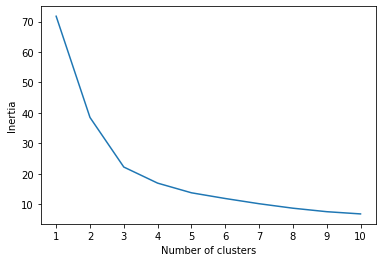

In [ ]:
# Initialize empty inertia list
distortions=[]
inertia = []
# Initialize k range
k = list(range(1,11))
# Looping through k list
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(reduced_data)
    distortions.append(sum(np.min(cdist(reduced_data, km.cluster_centers_,
                                        'euclidean'), axis=1)) / new.shape[0])
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
elbow_df = pd.DataFrame(elbow_data)
plt.plot(elbow_df['k'], elbow_df['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

<Figure size 432x288 with 0 Axes>

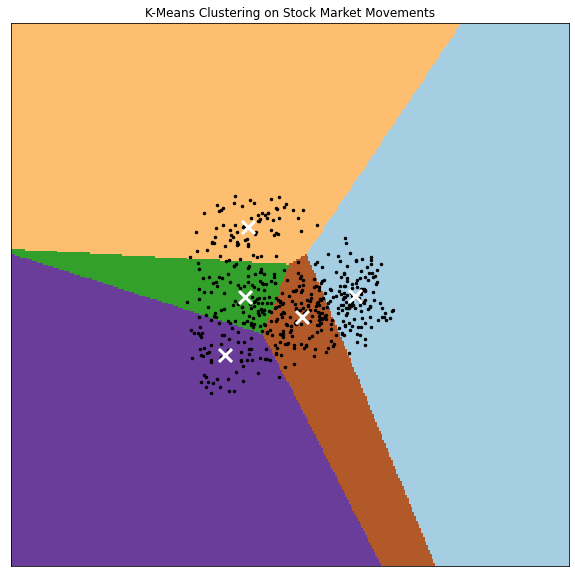

In [ ]:
# Define step size of mesh
h = 0.01

# plot the decision boundary
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:,0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain abels for each point in the mesh using our trained model
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

# define colorplot
cmap = plt.cm.Paired

# plot figure
plt.clf()
plt.figure(figsize=(10,10))
plt.imshow(Z, interpolation='nearest',
 extent = (xx.min(), xx.max(), yy.min(), yy.max()),
 cmap = cmap,
 aspect = 'auto', origin='lower')
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=5)


# plot the centroid of each cluster as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
 marker='x', s=169, linewidth=3,
 color='w', zorder=10)

plt.title('K-Means Clustering on Stock Market Movements')
# plt.xlim(x_min, x_max)
# plt.ylim(y_min, y_max)

ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.show()